In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 6)
pd.options.display.max_columns = None

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('codeforces/training.csv')

In [3]:
df_problems = pd.read_csv('~/codeforces-api/ui/problem_ratings.csv')
df_problems.tail()

,contestID,problemID,problemRating
4068,988,B,1216
4069,988,C,1502
4070,988,D,1831
4071,988,E,2101
4072,988,F,2301


In [4]:
rating = dict()
for index, row in df_problems.iterrows():
    problem = str(row['contestID']) + row['problemID']
    rating[problem] = row['problemRating']

### Final training table

In [5]:
for index, row in df.iterrows():
    problem = row['problem']
    df.loc[index, 'problemRating'] = rating[problem] if problem in rating else 1500
df.tail()

,day,problem,ac,seconds,problemRating
60,13,143B,1,1386,1296.0
61,13,224B,1,1200,1594.0
62,13,437B,1,582,1498.0
63,14,233B,2,1400,1503.0
64,14,219B,5,1800,1518.0


In [6]:
df.loc[:, ['ac','seconds','problemRating']].describe()

,ac,seconds,problemRating
count,65.000000,65.000000,65.000000
mean,1.800000,1736.784615,1528.030769
std,1.227294,1123.751064,246.313822
min,1.000000,167.000000,1031.000000
25%,1.000000,947.000000,1350.000000
50%,1.000000,1446.000000,1518.000000
75%,2.000000,2340.000000,1688.000000
max,6.000000,5400.000000,2387.000000


## Brief analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a63f99f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f9a5d40f8d0>], dtype=object)

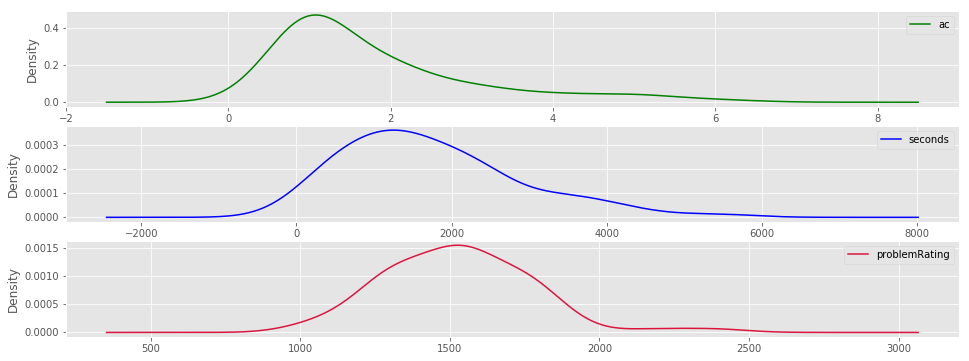

In [7]:
df.loc[:, ['ac','seconds','problemRating']].plot(subplots=True, kind='density', sharex=False, color=['g','b','crimson'])

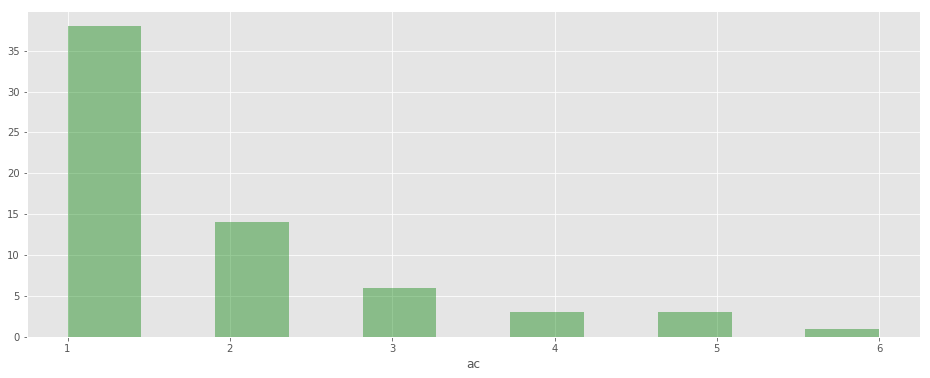

In [8]:
sns.distplot(df['ac'], color="green", kde=False)

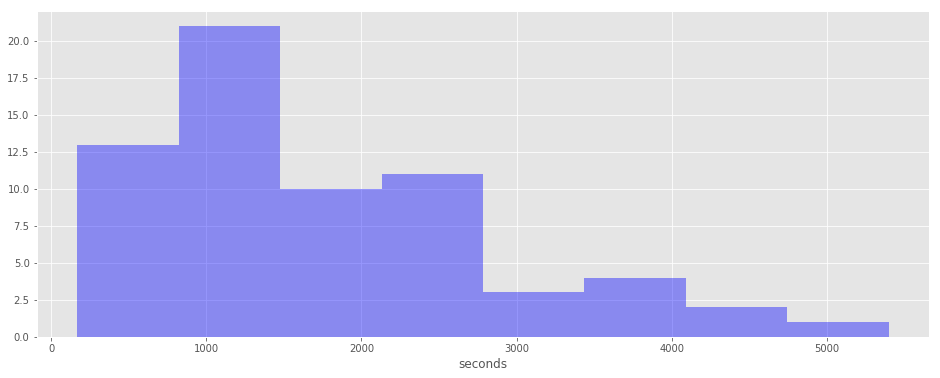

In [9]:
sns.distplot(df['seconds'], color="blue", kde=False, kde_kws={"shade": True})

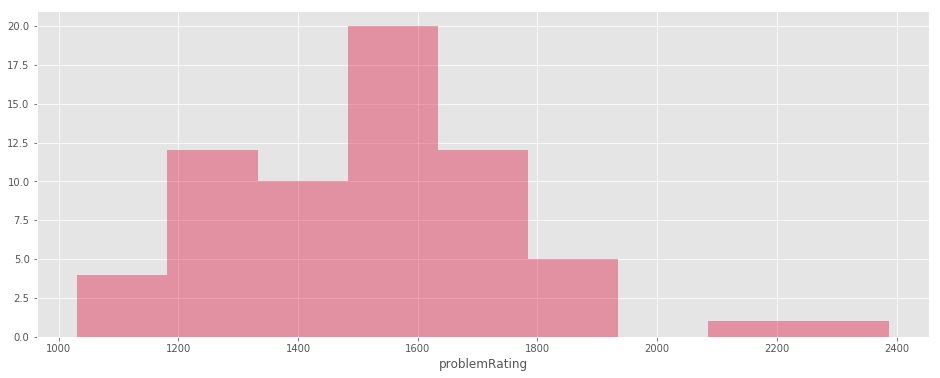

In [10]:
sns.distplot(df['problemRating'], color="crimson", kde=False)

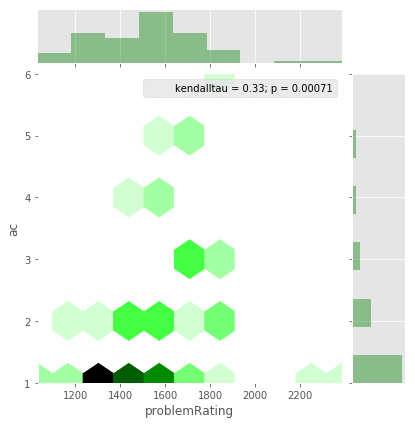

In [11]:
sns.jointplot(x='problemRating', y='ac', data=df, kind="hex", stat_func=kendalltau, color="green")

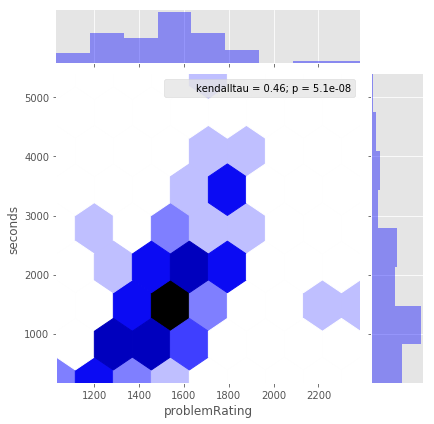

In [12]:
sns.jointplot(x='problemRating', y='seconds', data=df, kind="hex", stat_func=kendalltau, color="blue")

## Daily

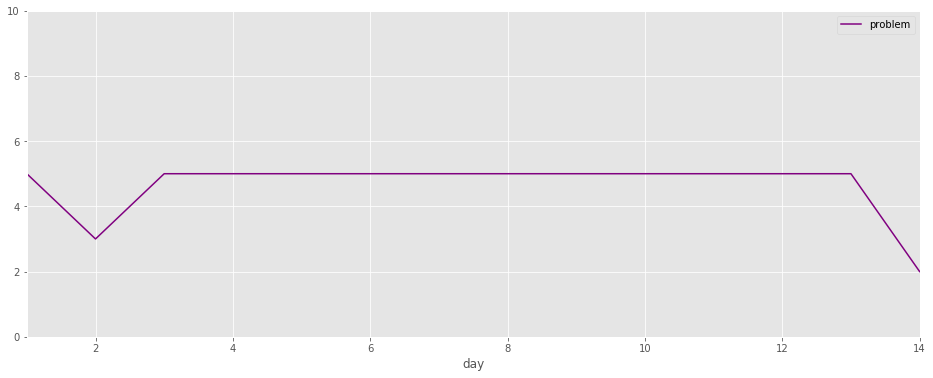

In [31]:
df_day = df.groupby('day')
df_day.count().plot(y='problem', color='purple', ylim=(0, 10))

In [14]:
df_day_mean = df_day.mean().reset_index()

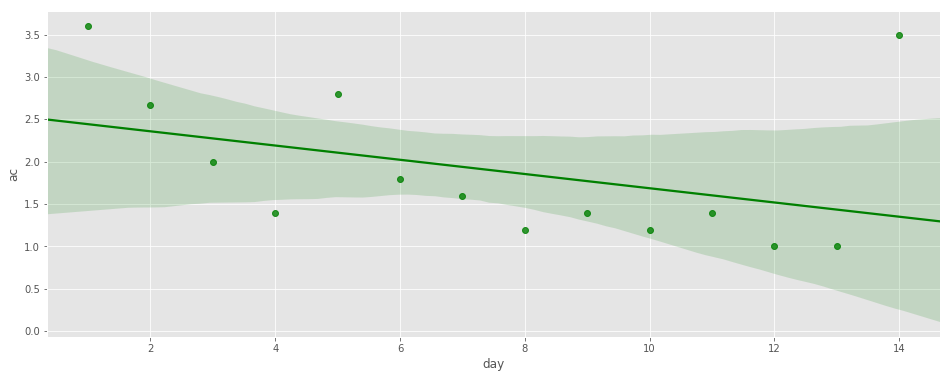

In [15]:
sns.regplot(x='day', y='ac', data=df_day_mean, color='green')

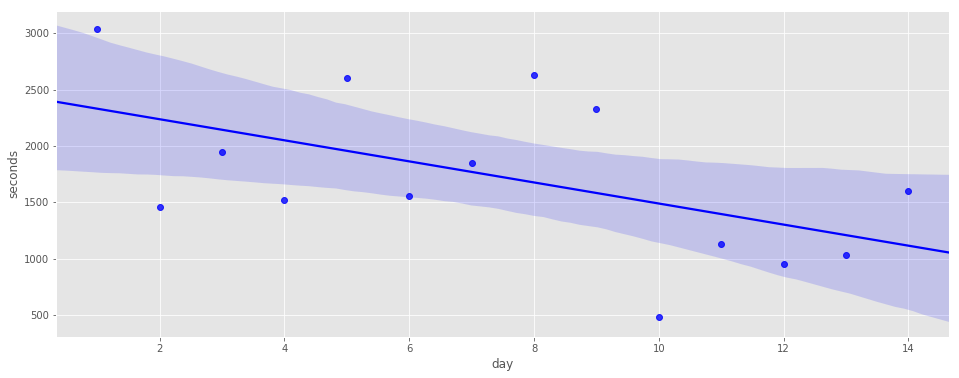

In [16]:
sns.regplot(x='day', y='seconds', data=df_day_mean, color='blue')

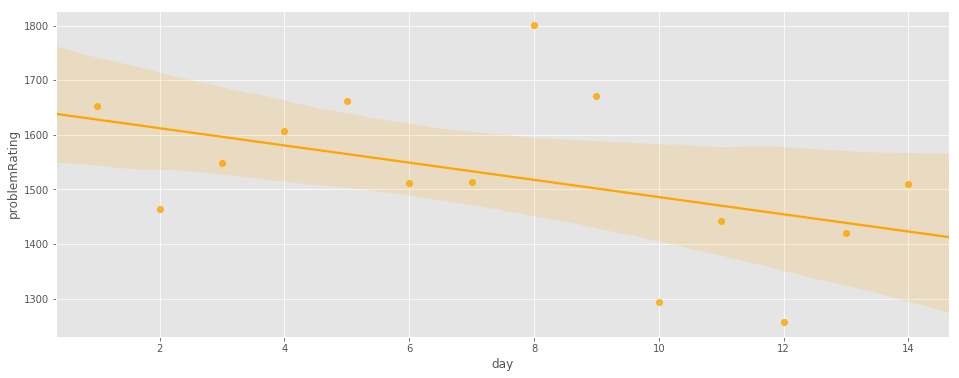

In [17]:
sns.regplot(x='day', y='problemRating', data=df_day_mean, color='orange')

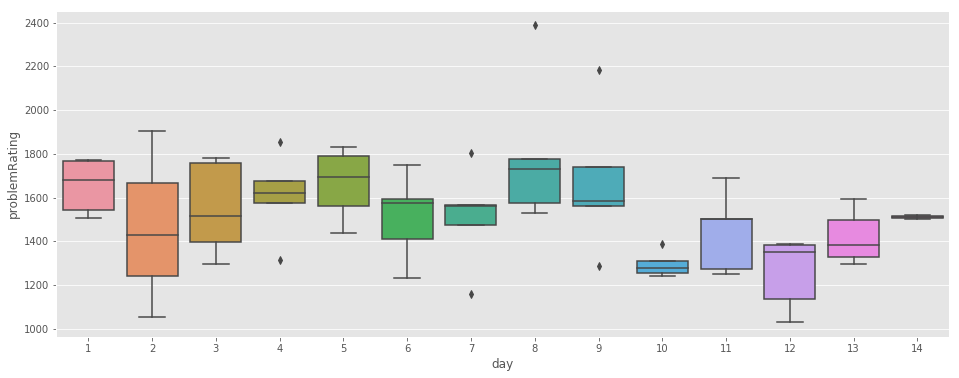

In [18]:
sns.boxplot(x="day", y="problemRating", data=df)

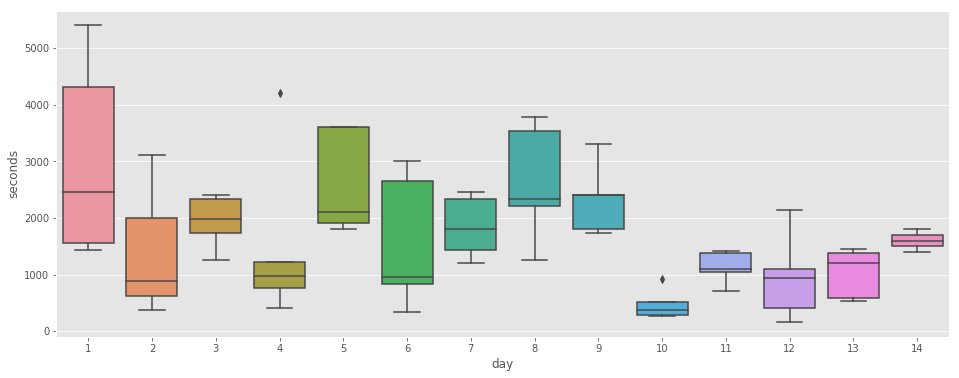

In [19]:
sns.boxplot(x="day", y="seconds", data=df)

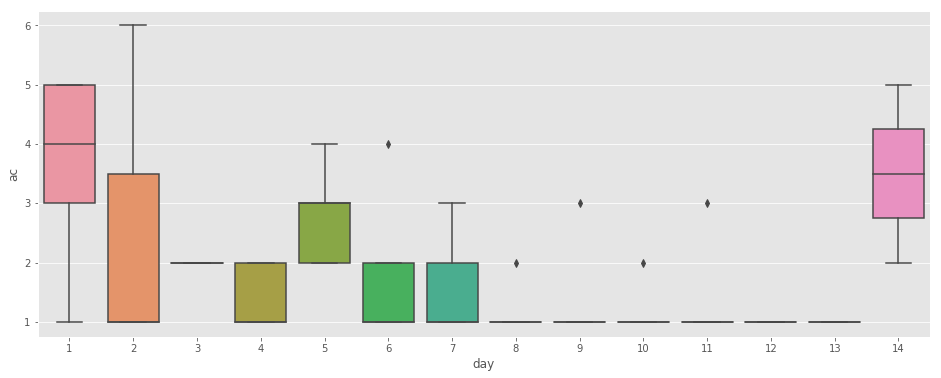

In [20]:
sns.boxplot(x="day", y="ac", data=df)

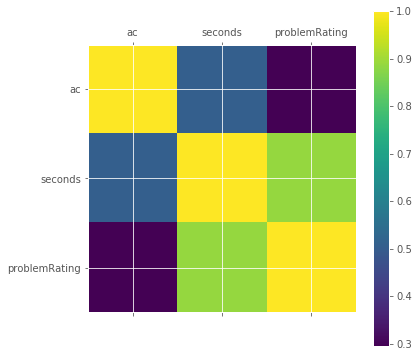

In [21]:
df_day_corr = df_day_mean.loc[:, ['ac','seconds','problemRating']].corr()
plt.matshow(df_day_corr)
plt.xticks(range(len(df_day_corr.columns)), df_day_corr.columns)
plt.yticks(range(len(df_day_corr.columns)), df_day_corr.columns)
plt.colorbar()

## Comparisons

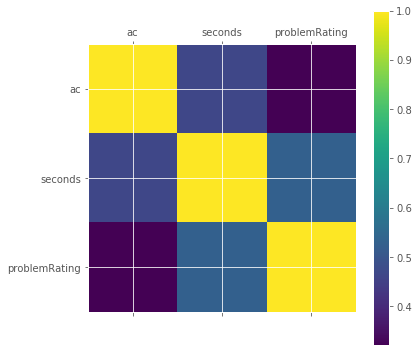

In [22]:
df_corr = df.loc[:, ['ac','seconds','problemRating']].corr()
plt.matshow(df_corr)
plt.xticks(range(len(df_corr.columns)), df_corr.columns)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
plt.colorbar()

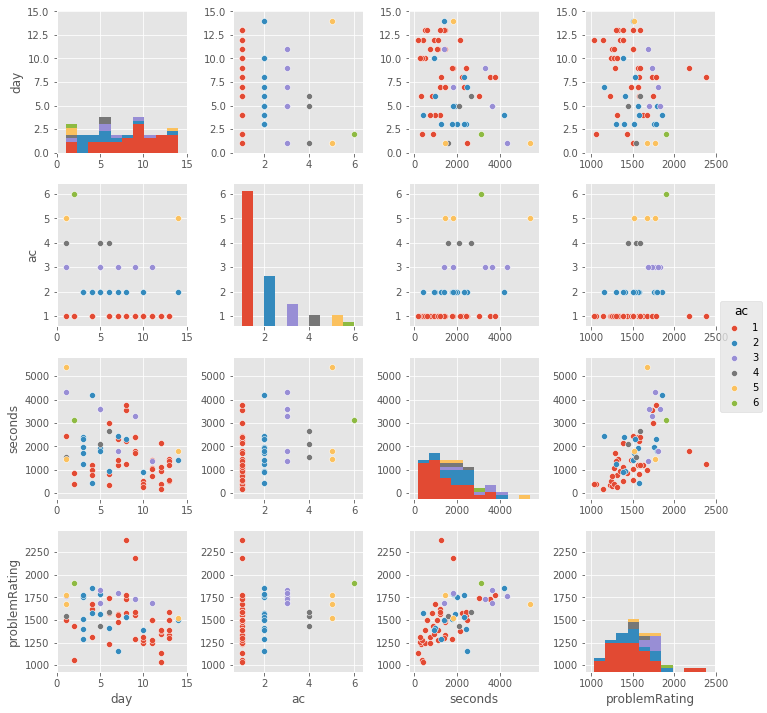

In [23]:
sns.pairplot(df, hue="ac")

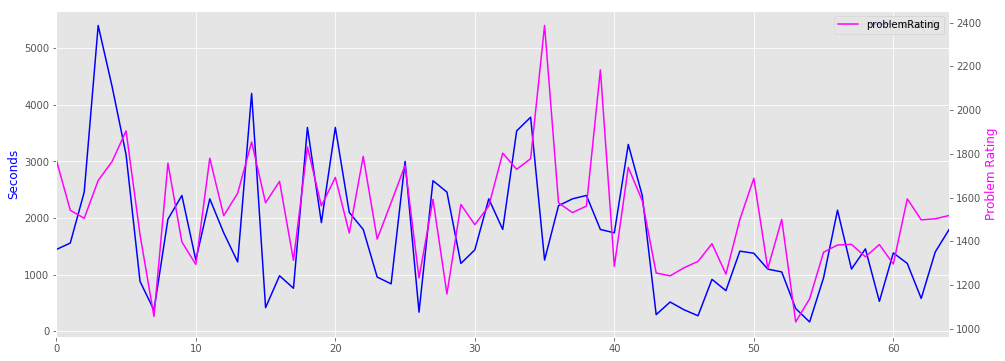

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Seconds', color='blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Problem Rating', color='magenta')

df.plot(x=df.index, y='seconds', color='blue', ax=ax1)
df.plot(x=df.index, y='problemRating', color='magenta', ax=ax2, grid=False)

# Rolling

In [25]:
rolling = df.rolling(window=7).mean()

## AC

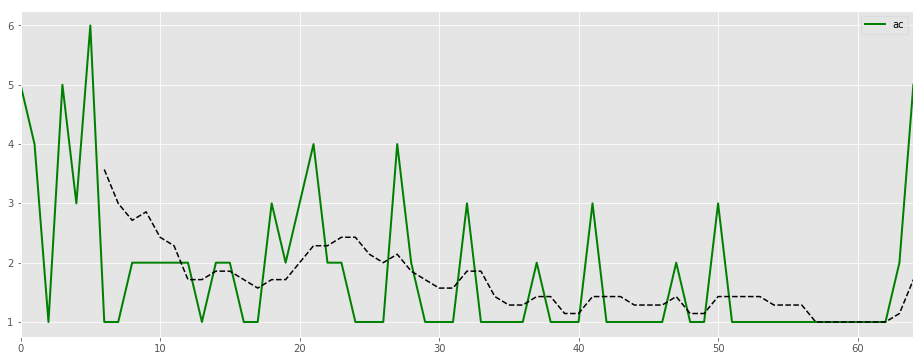

In [26]:
ax_df = df.plot(y='ac', color='g', lw=2)
rolling.plot(y='ac', color='black', style='--', ax=ax_df, legend=0)

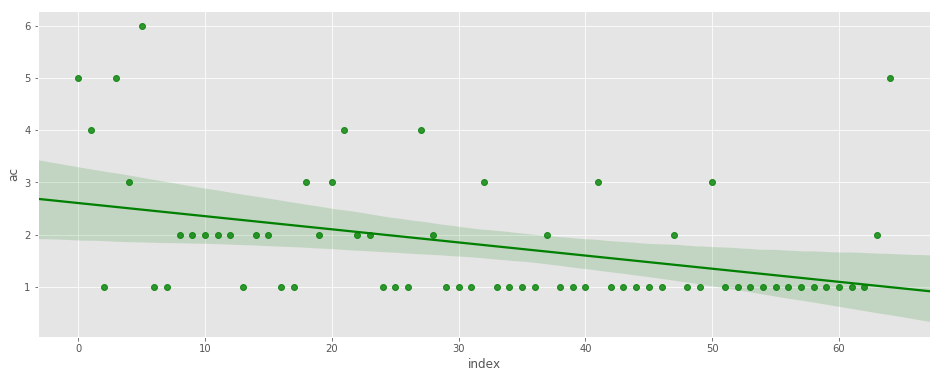

In [27]:
sns.regplot(x='index', y='ac', data=df.reset_index(), color='green')

## Seconds

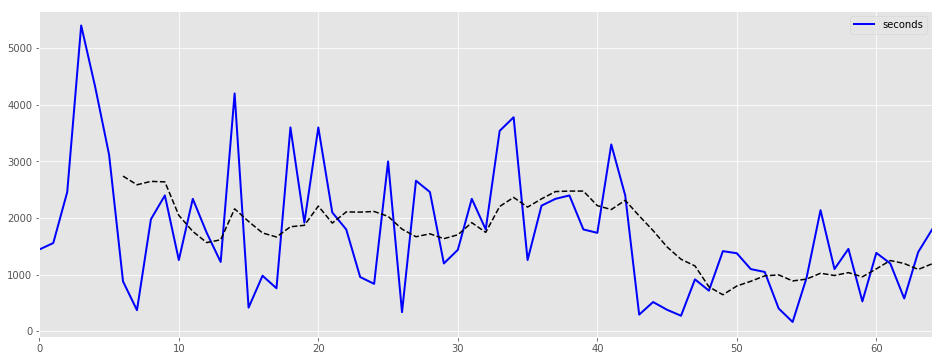

In [28]:
ax_df = df.plot(y='seconds', color='b', lw=2)
rolling.plot(y='seconds', color='black', style='--', ax=ax_df, legend=0)

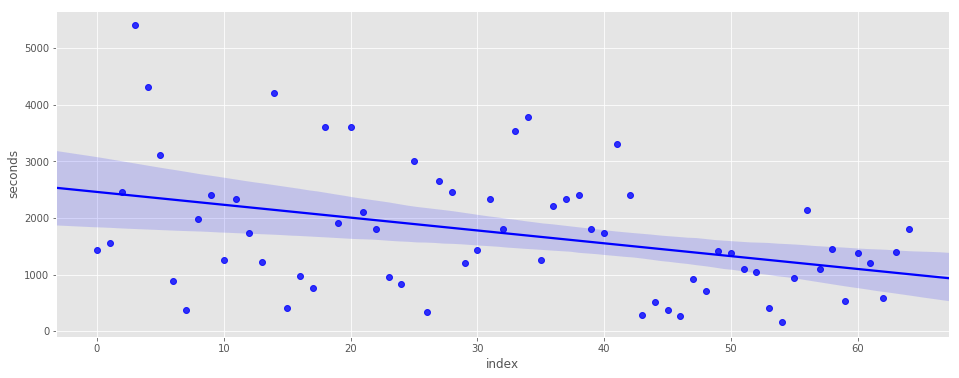

In [29]:
sns.regplot(x='index', y='seconds', data=df.reset_index(), color='blue')